Ce modèle de classification de panneaux de signalisation a été développé pour identifier et classer différents types de panneaux de signalisation(42 classes). Il utilise un ensemble de données contenant des images de panneaux de signalisation de différentes classes et met en œuvre une architecture de réseau de neurones convolutionnels (CNN) pour accomplir cette tâche. Le modèle a été formé à l'aide de TensorFlow et Keras.

# Utilsation du modele

Pour utiliser ce modèle, vous pouvez charger les poids du modèle à partir du fichier 'traffic_classifier.h5' et l'appliquer à de nouvelles images de panneaux de signalisation. Le modèle prend des images de 30x30 pixels en entrée et retourne la classe prédite pour chaque image.

N'oubliez pas de prétraiter les images de la même manière que pendant l'entraînement (redimensionnement et normalisation) avant de les soumettre au modèle pour la prédiction !!

Sinon vous trouverez des images a tester dans le dossier "Test"

# 1- Importation des Bibliothèques : 

Dans cette section, nous importons les bibliothèques Python nécessaires pour le projet. Cela inclut pandas pour la manipulation de données, matplotlib pour la visualisation, TensorFlow pour la création de modèles d'apprentissage automatique, PIL pour le traitement d'images, os pour la gestion des fichiers et des répertoires, scikit-learn pour le fractionnement des données et Keras pour la construction du modèle.

# 2-Chargement des Données : 
Nous parcourons les différentes classes de panneaux de signalisation (de 0 à 42) et chargeons les images correspondantes. Les images sont redimensionnéess, converties en tableaux NumPy, et les données et étiquettes sont stockées dans les listes data et labels.




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43 
cur_path = os.getcwd() 

for i in range(classes): 
    path = os.path.join(cur_path, 'train', str(i)) 
    images = os.listdir(path) 
    
    for a in images: 
        try: 
            image = Image.open(os.path.join(path, a)) 
            image = image.resize((30, 30)) 
            image = np.array(image) 
            data.append(image) 
            labels.append(i) 
        except: 
            print("Error loading image") 

data = np.array(data)
labels = np.array(labels)


# 3- Conversion et Fractionnement des Données : 

Les listes de données et d'étiquettes sont converties en tableaux NumPy pour être utilisées dans l'apprentissage automatique. Les dimensions des tableaux sont affichées pour vérification.


Les données sont divisées en ensembles d'entraînement (X_t1 et y_t1) et de test (X_t2 et y_t2) en utilisant la fonction train_test_split de scikit-learn. Cela permet d'évaluer les performances du modèle sur un ensemble de données de test distinct.

In [17]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [22]:
print(y_t1.shape) 
print(y_t2.shape)

(31367, 43)
(7842, 43)


# 4-Description et entrainement du modele:

Le modèle est un réseau de neurones convolutifs (CNN) séquentiel qui comprend plusieurs couches de convolution, de max-pooling, de couches entièrement connectées et de dropout pour régularisation comme suit:

Le modèle a été compilé avec l'optimiseur Adam et la fonction de perte "categorical_crossentropy" pour la classification multi-classe. Il a été entraîné sur un ensemble de données de formation et évalué sur un ensemble de données de test distinct.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Charger et prétraiter vos données (comme vous l'avez déjà fait)

# Créer un modèle séquentiel
model = Sequential()

# Ajouter la première couche de convolution
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_t1.shape[1:]))

# Ajouter une deuxième couche de convolution
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))

# Ajouter une couche de max-pooling
model.add(MaxPool2D(pool_size=(2, 2)))

# Ajouter une couche de dropout pour régularisation
model.add(Dropout(rate=0.25))

# Ajouter une troisième couche de convolution
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Ajouter une quatrième couche de convolution
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Ajouter une deuxième couche de max-pooling
model.add(MaxPool2D(pool_size=(2, 2)))

# Ajouter une deuxième couche de dropout pour régularisation
model.add(Dropout(rate=0.25))

# Aplatir les données pour les couches entièrement connectées
model.add(Flatten())

# Ajouter une couche entièrement connectée avec 256 neurones
model.add(Dense(256, activation='relu'))

# Ajouter une troisième couche de dropout pour régularisation
model.add(Dropout(rate=0.5))

# Couche de sortie avec 43 neurones (car il y a 43 classes de panneaux de signalisation)
model.add(Dense(43, activation='softmax'))

# Compiler le modèle avec un optimiseur, une fonction de perte et des métriques
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle avec vos données
eps = 15
history = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))


# 5 Tacer les graphiques

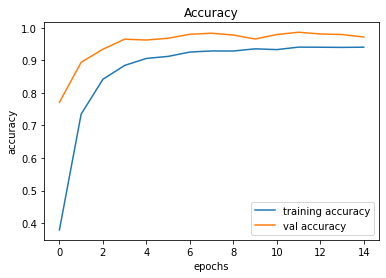

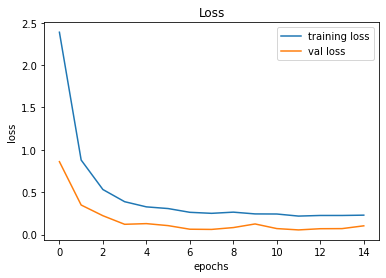

In [26]:
# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


# Tout le code:

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Epoch 1/10
981/981 [==============================] - 105s 105ms/step - loss: 1.7595 - accuracy: 0.5451 - val_loss: 0.2871 - val_accuracy: 0.9353
Epoch 2/10
981/981 [==============================] - 102s 104ms/step - loss: 0.5000 - accuracy: 0.8600 - val_loss: 0.2052 - val_accuracy: 0.9407
Epoch 3/10
981/981 [==============================] - 137s 140ms/step - loss: 0.3180 - accuracy: 0.9099 - val_loss: 0.0793 - val_accuracy: 0.9811
Epoch 4/10
981/981 [==============================] - 146s 149ms/step - loss: 0.2726 - accuracy: 0.9224 - val_loss: 0.0925 - val_accuracy: 0.9759
Epoch 5/10
981/981 [==============================] - 129s 132ms/step - loss: 0.2282 - accuracy: 0.9373 - val_loss: 0.0760 - val_accuracy: 0.9806
Epoch 6/10
981/981 [==============================] - 114s 117ms/step - loss: 0.2428 - accuracy: 0.9354 - val_loss: 0.0592 - val_accuracy: 0.9855
Epoch 7/10
981/981 [======================

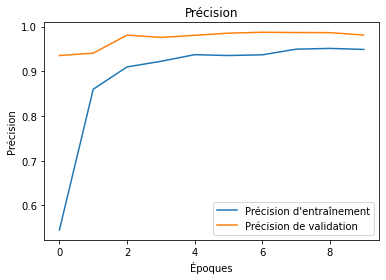

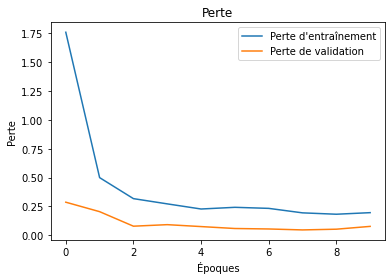

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Pour tracer la précision
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split  # Pour diviser les données d'entraînement et de test
from keras.utils import to_categorical  # Pour convertir les étiquettes en codage one-hot
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout  # Pour créer le CNN

data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Récupération des images et de leurs étiquettes
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Erreur lors du chargement de l'image")

# Conversion des listes en tableaux numpy
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

# Division des données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Conversion des étiquettes en encodage one-hot
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Création du modèle
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
eps = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=eps, validation_data=(X_test, y_test))
model.save('traffic_classifier.h5')

# Tracé des graphiques de précision
plt.figure(0)
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.title('Précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()



# Test de la précision sur le jeu de données de test

In [8]:


from sklearn.metrics import accuracy_score

y_test_data = pd.read_csv('Test.csv')
test_labels = y_test_data["ClassId"].values
test_imgs = y_test_data["Path"].values
test_data = []

for img in test_imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    test_data.append(np.array(image))

X_test_data = np.array(test_data)
test_pred_probs = model.predict(X_test_data)
test_pred = np.argmax(test_pred_probs, axis=1)

# Calcul de la précision sur les données de test
accuracy = accuracy_score(test_labels, test_pred)
print("Précision sur les données de test :", accuracy)

# Sauvegarde du modèle
model.save('traffic_classifier.h5')

395/395 [==============================] - 7s 18ms/step
Précision sur les données de test : 0.95027711797308


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Charger le modèle
model = load_model('traffic_classifier.h5')

# Charger les données de test
test_data = pd.read_csv('Test.csv')
X_test_paths = test_data['Path'].values
y_test = test_data['ClassId'].values

# Afficher les résultats pour les premières 10 images de test
num_images_to_display = 10

for i in range(num_images_to_display):
    # Charger et redimensionner l'image de test
    image_path = X_test_paths[i]
    image = Image.open(image_path)
    image = image.resize((30, 30))
    
    # Prétraiter l'image pour la prédiction
    image = np.array(image)
    image = image / 255.0  # Normalisation
    image = np.expand_dims(image, axis=0)  # Ajouter une dimension batch

    # Faire la prédiction
    predicted_class = model.predict(image)
    predicted_class = np.argmax(predicted_class)

  # Obtenir le nom de la classe prédite
    predicted_class_name = classes[predicted_class]

    # Afficher l'image et la prédiction
    plt.imshow(image[0])
    plt.title(f'Prediction: {predicted_class_name}')
    plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 78ms/step


TypeError: 'int' object is not subscriptable

# L'interface de test

C'est une interface graphique utilisateur pour classer des images de panneaux routiers à l'aide ce modele. L'interface permet à l'utilisateur de télécharger une image de panneau de signalisation, d'effectuer une classification en utilisant le modèle CNN, et d'afficher la classe prédite.

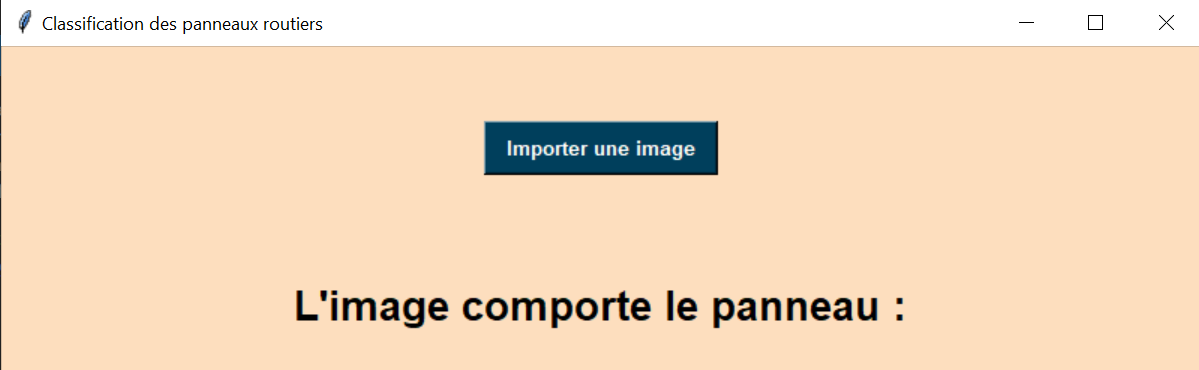

In [1]:
from IPython.display import Image

# Utilisation de barres obliques normales dans le chemin du fichier (compatible avec la plupart des systèmes d'exploitation)
image_path = "C:/Users/HP/Desktop/bb.png"

# Afficher l'image dans le notebook
Image(filename=image_path)

### Voici des exemples des resultats obtenus

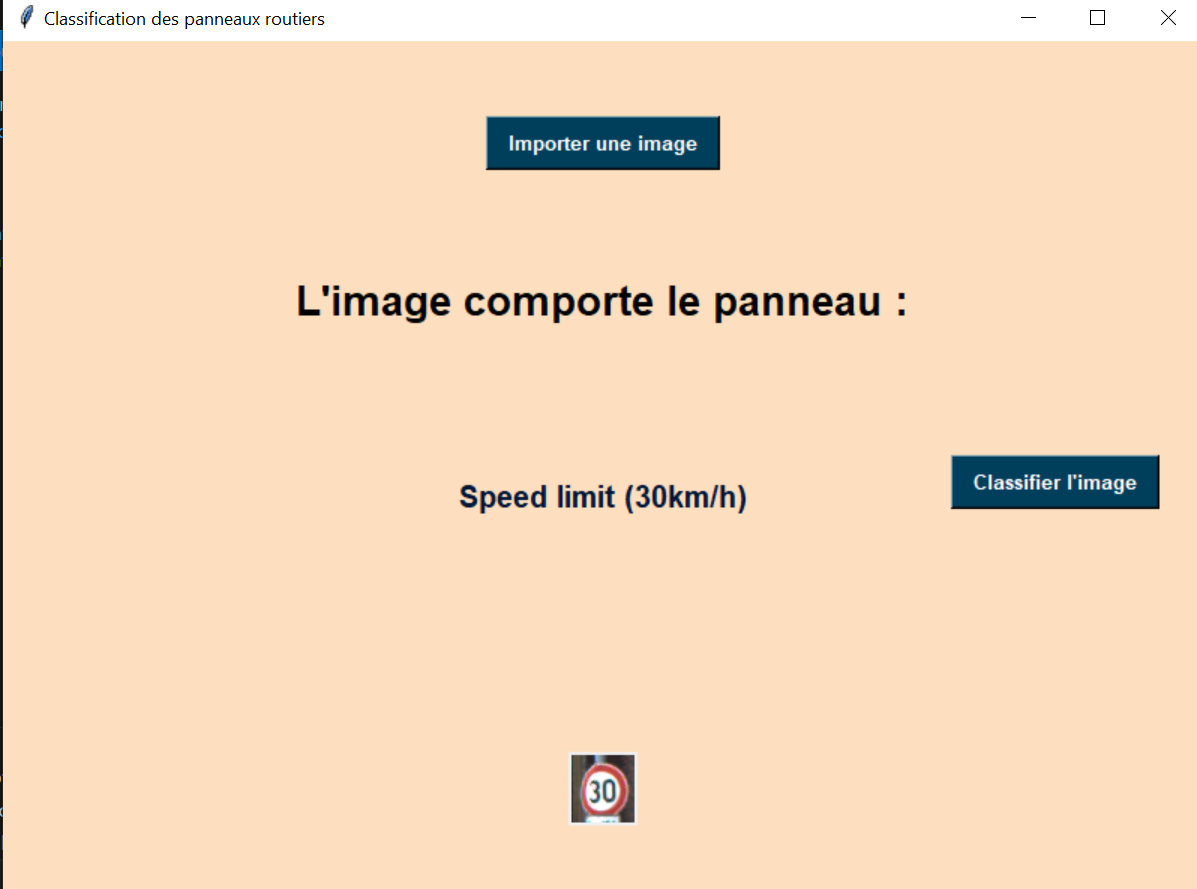

In [2]:
from IPython.display import Image

# Utilisation de barres obliques normales dans le chemin du fichier (compatible avec la plupart des systèmes d'exploitation)
image_path = "C:/Users/HP/Desktop/1.png"

# Afficher l'image dans le notebook
Image(filename=image_path)

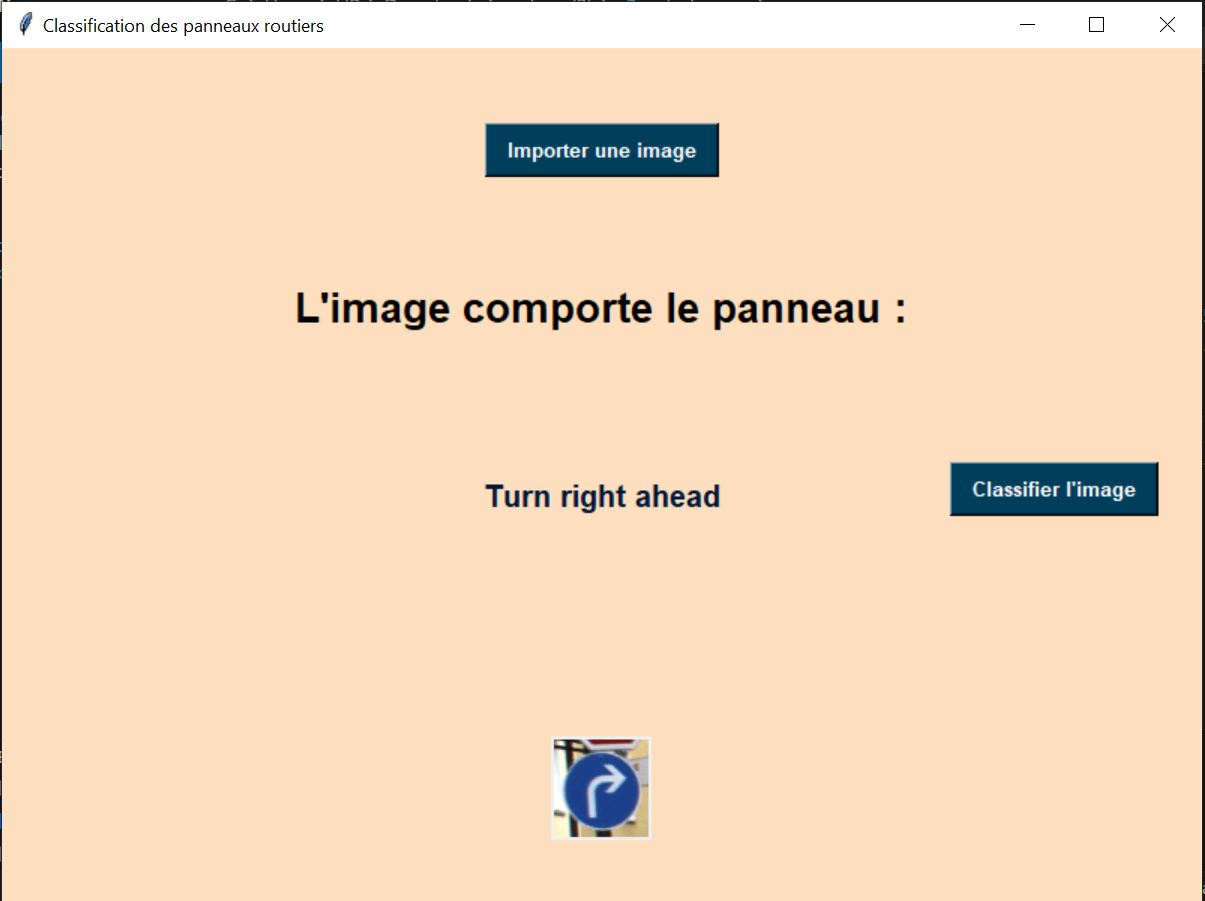

In [3]:
from IPython.display import Image

# Utilisation de barres obliques normales dans le chemin du fichier (compatible avec la plupart des systèmes d'exploitation)
image_path = "C:/Users/HP/Desktop/3.png"

# Afficher l'image dans le notebook
Image(filename=image_path)

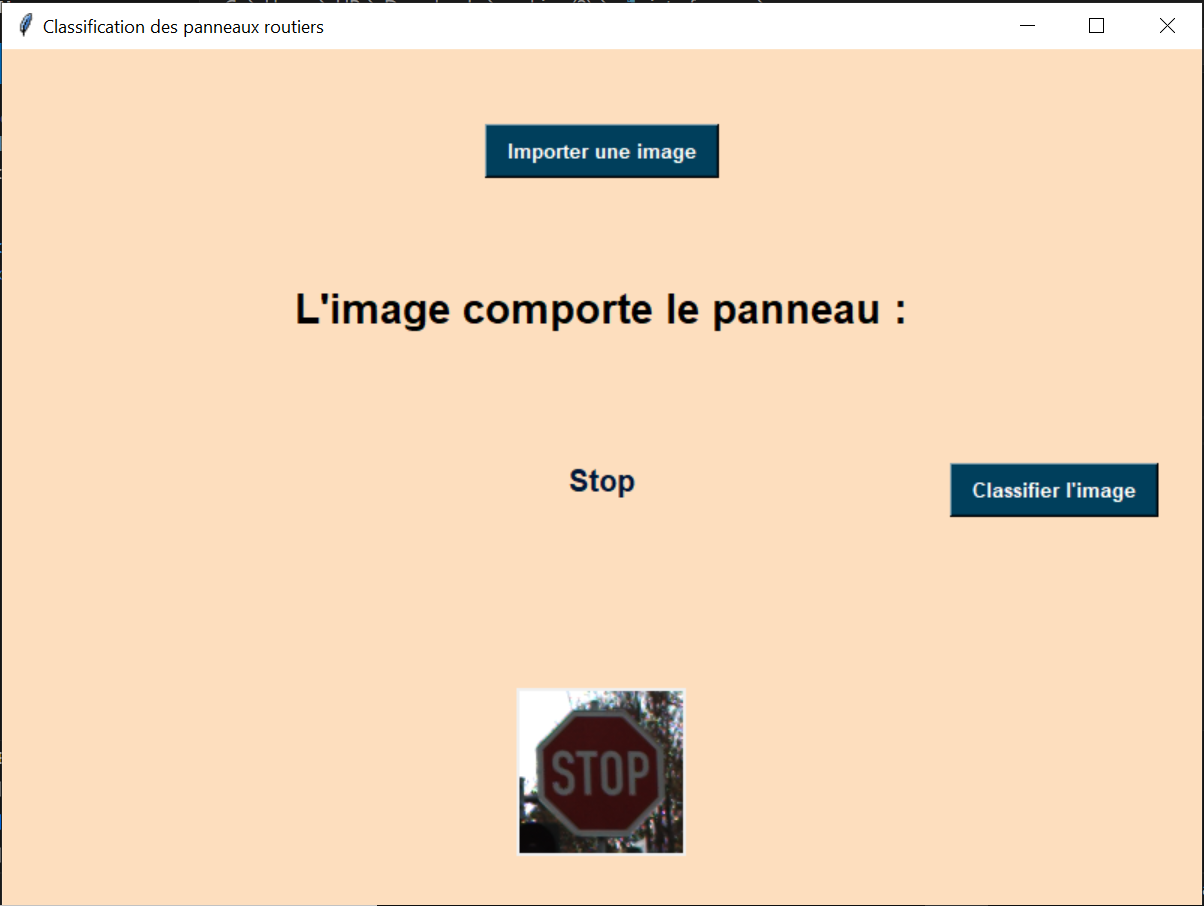

In [5]:
from IPython.display import Image

# Utilisation de barres obliques normales dans le chemin du fichier (compatible avec la plupart des systèmes d'exploitation)
image_path = "C:/Users/HP/Desktop/2.png"

# Afficher l'image dans le notebook
Image(filename=image_path)

# Résumé 



Après l'entraînement du modèle sur 15 époques, voici les résultats obtenus :

#### Précision sur les données de test : 95.03%

Le modèle a atteint une précision élevée dans la classification des panneaux de signalisation, ce qui indique qu'il est capable de reconnaître efficacement différentes classes de panneaux routiers.

In [1]:

import numpy as np
import tensorflow as tf
from tensorflow import keras

model = keras.models.load_model('traffic_classifier.h5')

# Configuration du modèle HLS :

In [2]:
import hls4ml

config = hls4ml.utils.config_from_keras_model(model, granularity='name')
config['Model']['Precision'] = 'ap_fixed<16,6>'
config['Model']['ReuseFactor'] = 1

C:\Users\HP\anaconda3\lib\site-packages\hls4ml\converters\__init__.py:24: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!", stacklevel=1)


Interpreting Sequential
Topology:
Layer name: conv2d_input, layer type: InputLayer, input shapes: [[None, 30, 30, 3]], output shape: [None, 30, 30, 3]
Layer name: conv2d, layer type: Conv2D, input shapes: [[None, 30, 30, 3]], output shape: [None, 26, 26, 32]
Layer name: conv2d_1, layer type: Conv2D, input shapes: [[None, 26, 26, 32]], output shape: [None, 22, 22, 32]
Layer name: max_pooling2d, layer type: MaxPooling2D, input shapes: [[None, 22, 22, 32]], output shape: [None, 11, 11, 32]
Layer name: conv2d_2, layer type: Conv2D, input shapes: [[None, 11, 11, 32]], output shape: [None, 9, 9, 64]
Layer name: conv2d_3, layer type: Conv2D, input shapes: [[None, 9, 9, 64]], output shape: [None, 7, 7, 64]
Layer name: max_pooling2d_1, layer type: MaxPooling2D, input shapes: [[None, 7, 7, 64]], output shape: [None, 3, 3, 64]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 3, 3, 64]], output shape: [None, 576]
Layer name: dense, layer type: Dense, input shapes: [[None, 576]], out

In [3]:
import keras
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Flatten, Dense

model = keras.models.load_model('traffic_classifier.h5')

input_shape = (30, 30, 3)

input_layer = Input(shape=input_shape)
x = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=input_shape)(input_layer)
x = Conv2D(filters=32, kernel_size=(5, 5), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
output_layer = Dense(43, activation='softmax')(x)

functional_model = keras.models.Model(inputs=input_layer, outputs=output_layer)


# Conversion en modèle HLS

Pour déployer ce modèle sur une carte FPGA (ou un autre matériel matériel spécifique).


In [5]:
import hls4ml
hls_model = hls4ml.converters.convert_from_keras_model(functional_model, hls_config=config)
# hls_model.compile()

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 30, 30, 3]], output shape: [None, 30, 30, 3]
Layer name: conv2d, layer type: Conv2D, input shapes: [[None, 30, 30, 3]], output shape: [None, 26, 26, 32]
Layer name: conv2d_1, layer type: Conv2D, input shapes: [[None, 26, 26, 32]], output shape: [None, 22, 22, 32]
Layer name: max_pooling2d, layer type: MaxPooling2D, input shapes: [[None, 22, 22, 32]], output shape: [None, 11, 11, 32]
Layer name: conv2d_2, layer type: Conv2D, input shapes: [[None, 11, 11, 32]], output shape: [None, 9, 9, 64]
Layer name: conv2d_3, layer type: Conv2D, input shapes: [[None, 9, 9, 64]], output shape: [None, 7, 7, 64]
Layer name: max_pooling2d_1, layer type: MaxPooling2D, input shapes: [[None, 7, 7, 64]], output shape: [None, 3, 3, 64]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 3, 3, 64]], output shape: [None, 576]
Layer name: dense, layer type: Dense, input shapes: [[None, 576]], output shape:

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        